<a href="https://colab.research.google.com/github/kiranfranklin999/Exploring_QSAR_from_data_curation_to_SAR/blob/main/model/LSTM_QSAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install git+https://github.com/EBjerrum/molvecgen

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/EBjerrum/molvecgen to /tmp/pip-req-build-dvyzv1bd
  Running command git clone --filter=blob:none --quiet https://github.com/EBjerrum/molvecgen /tmp/pip-req-build-dvyzv1bd
  Resolved https://github.com/EBjerrum/molvecgen to commit f81d5aade18bea60882f5845877f6283366bbe91
  Preparing metadata (setup.py) ... done
  Created wheel for molvecgen: filename=molvecgen-0.1-py3-none-any.whl size=11357 sha256=660d20e5c75dbb35912121ce2cc39044196a916963bad162d5622b0a0fd9edbc
  Stored in directory: /tmp/pip-ephem-wheel-cache-0d7kr12k/wheels/1c/de/14/fd9892b48271e63e56b00c7015c754ae6189e258fa313a7c63
Successfully built molvecgen


In [3]:
! pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 45.6 MB/s eta 0:00:00


In [3]:
from molvecgen import SmilesVectorizer
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
smiles = [ "CCC(=O)O[C@@]1(CC[NH+](C[C@H]1CC=C)C)c2ccccc2",
            "CCC[S@@](=O)c1ccc2c(c1)[nH]/c(=N/C(=O)OC)/[nH]2"]*10
          
mols =   [Chem.MolFromSmiles(smile) for smile in smiles]
mols

In [5]:
sm_en = SmilesVectorizer(canonical=True, augment=False)

print("Default Charset %s"%sm_en.charset)
print("Default Maximum allowed SMILES length %s"%sm_en.maxlength)

Default Charset @C)(=cOn1S2/H[N]\^$?
Default Maximum allowed SMILES length 120


In [6]:
sm_en.fit(mols, extra_chars=["\\"])
print()
print("After fitting")
print("Charset after fit %s"%sm_en.charset)
print("Maximum allowed SMILES length %s"%sm_en.maxlength)


After fitting
Charset after fit (O)]1H+=[@NS/c2Cn\^$?
Maximum allowed SMILES length 45


In [7]:
sm_en_no_extra = SmilesVectorizer(canonical=True, augment=False)

print("Default Charset %s"%sm_en_no_extra.charset)
print("Default Maximum allowed SMILES length %s"%sm_en_no_extra.maxlength)
sm_en_no_extra.fit(mols)
print()
print("After fitting")
print("Charset after fit %s"%sm_en_no_extra.charset)
print("Maximum allowed SMILES length %s"%sm_en_no_extra.maxlength)

Default Charset @C)(=cOn1S2/H[N]\^$?
Default Maximum allowed SMILES length 120

After fitting
Charset after fit (O)]1H+=[@NS/c2Cn\^$?
Maximum allowed SMILES length 45


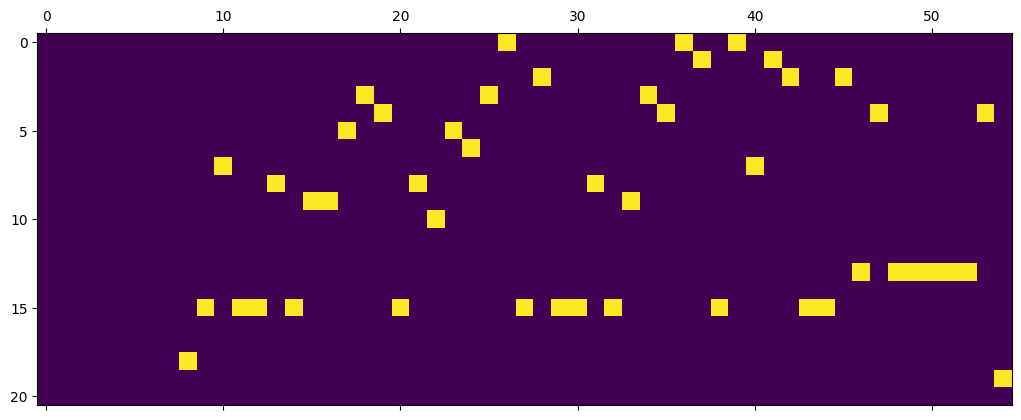

In [8]:
mol_vects = sm_en.transform(mols)
plt.matshow(mol_vects[0].T)

In [12]:
mol_vects.shape

(20, 55, 21)

In [13]:
mol_vects

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
#It's possible to strip the start and endchar
sm_en.reverse_transform(mol_vects[0:2])

array(['C=CC[C@@H]1C[NH+](C)CC[C@]1(OC(=O)CC)c1ccccc1',
       'CCC[S@@](=O)c1ccc2[nH]/c(=N\\C(=O)OC)[nH]c2c1'], dtype='<U45')

In [10]:
sm_en.reverse_transform(mol_vects[0:2], strip=False)

array(['^C=CC[C@@H]1C[NH+](C)CC[C@]1(OC(=O)CC)c1ccccc1$',
       '^CCC[S@@](=O)c1ccc2[nH]/c(=N\\C(=O)OC)[nH]c2c1$'], dtype='<U47')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem, DataStructs
from rdkit.Chem import PandasTools, AllChem
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv("/content/Chembl_pIC50_maccs.csv")
data.head(1)

,SMILES,pIC50,0,1,2,3,4,5,6,7,...,157,158,159,160,161,162,163,164,165,166
0,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5.30103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [6]:
data['Molecule'] = [ Chem.MolFromSmiles(i) for i in data['SMILES']]
data.head(1)

,SMILES,pIC50,0,1,2,3,4,5,6,7,...,158,159,160,161,162,163,164,165,166,Molecule
0,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5.30103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,<rdkit.Chem.rdchem.Mol object at 0x7fa240b7ee30>


In [7]:
from molvecgen.vectorizers import SmilesVectorizer


In [8]:
smivec = SmilesVectorizer(pad=1, leftpad=True, canonical=False, augment=True)
smivec.fit(data.Molecule.values, )

In [16]:
y = data.pIC50.values.reshape((-1, 1))
X = data.SMILES.values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.05, random_state=42)

In [18]:
# Normalizing output using standard scaling
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)
y_validation = scaler.transform(y_validation)

In [55]:
def preprocess_input(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return smivec.transform([mol])[0]

def preprocess_output(y):
    return y.reshape((-1, 1))

In [56]:
# Preprocess the training dataset
X_train_preprocessed = [preprocess_input(x) for x in X_train]
X_train_preprocessed = np.array(X_train_preprocessed)
y_train_preprocessed = preprocess_output(y_train)

In [ ]:
y_train_preprocessed

In [57]:
import tensorflow as tf
batch_size = 128
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_preprocessed, y_train_preprocessed))
train_dataset = train_dataset.batch(batch_size)

In [58]:
next(iter(train_dataset.take(1)))

(<tf.Tensor: shape=(128, 212, 37), dtype=int8, numpy=
 array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 1, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 1, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 1, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 1, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 

In [60]:
X_validation_preprocessed = [preprocess_input(x) for x in X_validation]
X_validation_preprocessed = np.array(X_validation_preprocessed)
y_validation_preprocessed = preprocess_output(y_validation)

In [61]:
lstm_size = 128  # The size of the LSTM layer
hidden_size = 128  # The size of the hidden non-linear layer
dropout_rate = 0.50  # The dropout rate
output_size = 1  # This is just a single task, so this will be one
learning_rate = 0.003
epochs = 10

In [63]:
# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=lstm_size, input_shape=(smivec.dims[0], smivec.dims[1])),
    tf.keras.layers.Dense(hidden_size, activation='relu'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(output_size)
])



In [64]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='mean_squared_error')



In [65]:
# Train the model
model.fit(train_dataset, epochs=epochs, validation_data=(X_validation_preprocessed, y_validation_preprocessed))

# Preprocess the test data
X_test_preprocessed = [preprocess_input(x) for x in X_test]
X_test_preprocessed = np.array(X_test_preprocessed)
X_test_t = tf.convert_to_tensor(X_test_preprocessed, dtype=tf.float32)

# Prediction
y_pred = model.predict(X_test_t)

# Inverse scaling on predictions
y_pred = scaler.inverse_transform(y_pred)

# Print the predictions
print(y_pred)

Epoch 1/10
8/8 [==============================] - 8s 634ms/step - loss: 0.9818 - val_loss: 0.8199
Epoch 2/10
8/8 [==============================] - 7s 843ms/step - loss: 0.9039 - val_loss: 0.8534
Epoch 3/10
8/8 [==============================] - 6s 753ms/step - loss: 0.9153 - val_loss: 0.8718
Epoch 4/10
8/8 [==============================] - 6s 706ms/step - loss: 0.8773 - val_loss: 0.8790
Epoch 5/10
8/8 [==============================] - 4s 516ms/step - loss: 0.8101 - val_loss: 0.8089
Epoch 6/10
8/8 [==============================] - 6s 761ms/step - loss: 0.7341 - val_loss: 0.7111
Epoch 7/10
8/8 [==============================] - 4s 528ms/step - loss: 0.7139 - val_loss: 0.6106
Epoch 8/10
8/8 [==============================] - 4s 524ms/step - loss: 0.7015 - val_loss: 0.6600
Epoch 9/10
8/8 [==============================] - 5s 646ms/step - loss: 0.6408 - val_loss: 0.5575
Epoch 10/10
4/4 [==============================] - 1s 82ms/step
[[7.67971  ]
 [5.269241 ]
 [5.635264 ]
 [5.363528 ]
 [

In [66]:
model.evaluate(X_test_t)

4/4 [==============================] - 1s 5ms/step - loss: 0.0000e+00


0.0